# Zillow Bestimate
## Modeling Notebook

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
import prepare
import explore

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

In [28]:
# let's bring in the data
df = prepare.prep_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23937 entries, 11721753 to 10713993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bath             23937 non-null  float64
 1   bed              23937 non-null  int64  
 2   sqft_calc        23937 non-null  int64  
 3   fips             23937 non-null  int64  
 4   yearbuilt        23937 non-null  int64  
 5   appraised_value  23937 non-null  int64  
 6   tax_amount       23937 non-null  float64
 7   age              23937 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.6 MB


In [29]:
# split our data...
train, \
validate, \
test, \
X_train, \
y_train, \
X_validate, \
y_validate, \
X_test, \
y_test = prepare.zillow_split(df, 'appraised_value')

In [30]:
# What are we looking at here?
X_train.head()

,bath,bed,sqft_calc,fips,yearbuilt,tax_amount,age
parcel_id,,,,,,,
11455769,1.0,2,1250,6037,1947,1204.48,70
12283129,1.0,3,1128,6037,1933,825.62,84
11848574,2.0,3,1336,6037,1953,7720.61,64
12363325,2.0,4,1476,6037,1923,4673.24,94
14406611,2.5,3,2765,6059,1976,8295.54,41


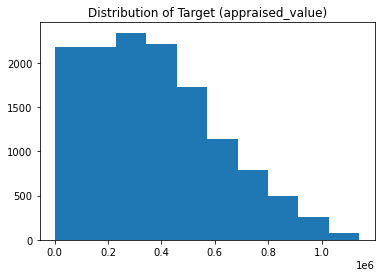

In [31]:
# what is the distribution of our target variable (appraised_value)
plt.hist(y_train)
plt.title('Distribution of Target (appraised_value)')
plt.show()

In [32]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict av_pred_mean
av_pred_mean = y_train['appraised_value'].mean()
y_train['av_pred_mean'] = av_pred_mean
y_validate['av_pred_mean'] = av_pred_mean

# RMSE of av_pred_mean
rmse_train = mean_squared_error(y_train['appraised_value'], y_train['av_pred_mean']) ** 0.5
rmse_validate = mean_squared_error(y_validate['appraised_value'], y_validate['av_pred_mean']) ** 0.5

# How did the baseline mean perform
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  239384.06 
Validate/Out-of-Sample:  236992.24


In [33]:
# compute av_pred_median
av_pred_median = y_train['appraised_value'].median()
y_train['av_pred_median'] = av_pred_median
y_validate['av_pred_median'] = av_pred_median

# RMSE of av_pred_mean
rmse_train = mean_squared_error(y_train['appraised_value'], y_train['av_pred_median']) ** 0.5
rmse_validate = mean_squared_error(y_validate['appraised_value'], y_validate['av_pred_median']) ** 0.5

# How did the baseline mean perform
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  241452.38 
Validate/Out-of-Sample:  238868.74


In [34]:
# Clean it up now
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate.round(2),
    'r^2_validate': explained_variance_score(y_validate['appraised_value'], y_validate['av_pred_mean'])}])

In [35]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,238868.74,0.0


In [37]:
y_train.head()

,appraised_value,av_pred_mean,av_pred_median
parcel_id,,,
11455769,91276,374572.06416,343036.0
12283129,39349,374572.06416,343036.0
11848574,569000,374572.06416,343036.0
12363325,286850,374572.06416,343036.0
14406611,797022,374572.06416,343036.0


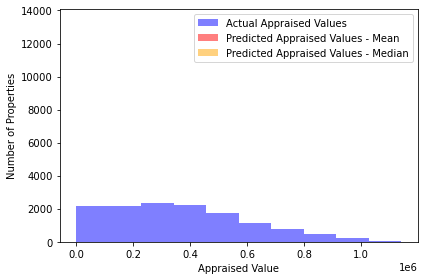

In [38]:
# plot to visualize actual vs predicted. 
plt.hist(y_train['appraised_value'], color='blue', alpha=.5, label="Actual Appraised Values")
plt.hist(y_train['av_pred_mean'], bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Appraised Values - Mean")
plt.hist(y_train['av_pred_median'], bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Appraised Values - Median")
plt.xlabel("Appraised Value")
plt.ylabel("Number of Properties")
plt.legend()
plt.ylim()
plt.show()

#### Takeaways:
- The mean appears to be a slightly more accurate baseline model.
- It's average appraised_value prediction is off by $237k